In [1]:
# dependencies and setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read and display first data set
civilian_labor_df = pd.read_csv('data/civilian-labor-force-by-sex.csv')
civilian_labor_df.head()

,Year,Number of women in the civilian labor force (in thousands),Number of men in the civilian labor force (in thousands),Share of the civilian labor force who are women (percent),Share of the civilian labor force who are men (percent)
0,1948,"17,335","43,286",28.6,71.4
1,1949,"17,788","43,498",29.0,71.0
2,1950,"18,389","43,819",29.6,70.4
3,1951,"19,016","43,001",30.7,69.3
4,1952,"19,269","42,869",31.0,69.0


In [3]:
percent_women_df = pd.DataFrame({"Year": civilian_labor_df["Year"],
                                "Women in Workforce(%)": civilian_labor_df["Share of the civilian labor force who are women (percent)"]})
percent_women_df.head()

,Year,Women in Workforce(%)
0,1948,28.6
1,1949,29.0
2,1950,29.6
3,1951,30.7
4,1952,31.0


In [4]:
# create x and y for plotting
x_axis = percent_women_df["Year"]
percent_women = percent_women_df["Women in Workforce(%)"]

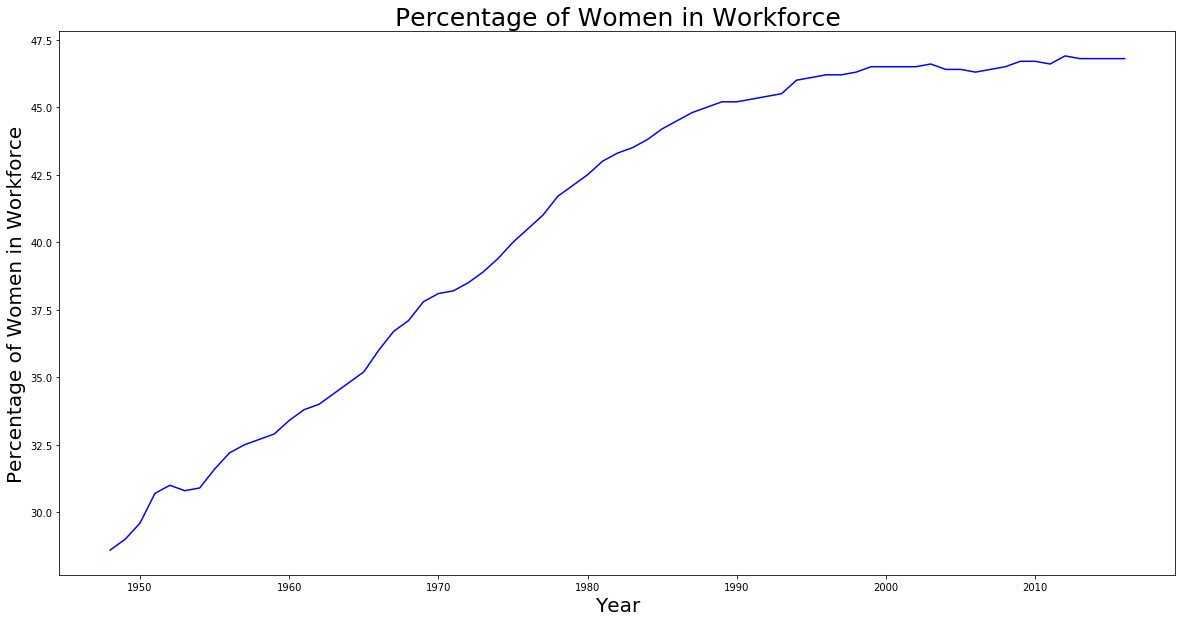

In [5]:
# plot crude data % of women in workforce
plt.figure(figsize=(20,10))
plt.title("Percentage of Women in Workforce", fontsize=25)
plt.xlabel("Year",  fontsize=20)
plt.ylabel("Percentage of Women in Workforce", fontsize=20)
plt.plot(x_axis, percent_women, color='blue')
plt.show()

In [6]:
# read in second data set, rename columns, and display
gdp_df = pd.read_csv('data/US_GDP_by_Quarter.csv')
gdp_df.rename(columns={'DATE_BY_QUARTER':'Date',
                          'BILLIONS_OF_DOLLARS':'Dollars (in Billions)'}, 
                 inplace=True)
gdp_df.head()

,Date,Dollars (in Billions)
0,1947-01-01,243.1
1,1947-04-01,246.3
2,1947-07-01,250.1
3,1947-10-01,260.3
4,1948-01-01,266.2


In [7]:
# Split year from full date (we want years instead of quarters)
gdp_df[["Year", "Month", "Day"]] = gdp_df["Date"].str.split("-", expand=True)

# Calcluate mean per year
yearly_gdp = gdp_df.groupby(["Year"]).mean()

# Set index and display
yearly_gdp = yearly_gdp.reset_index('Year')
yearly_gdp.head()

,Year,Dollars (in Billions)
0,1947,249.950
1,1948,274.825
2,1949,272.850
3,1950,300.175
4,1951,347.325


In [8]:
# drop year 1947 so years match with previous data set and CHANGE YEAR TO INTEGER!!!
clean_yearly_gdp = yearly_gdp.drop([0])
dollars = clean_yearly_gdp["Dollars (in Billions)"]
clean_yearly_gdp["Year"]=clean_yearly_gdp["Year"].astype(int)
# clean_yearly_gdp["Year"].values
clean_yearly_gdp.head()

,Year,Dollars (in Billions)
1,1948,274.825
2,1949,272.850
3,1950,300.175
4,1951,347.325
5,1952,367.725


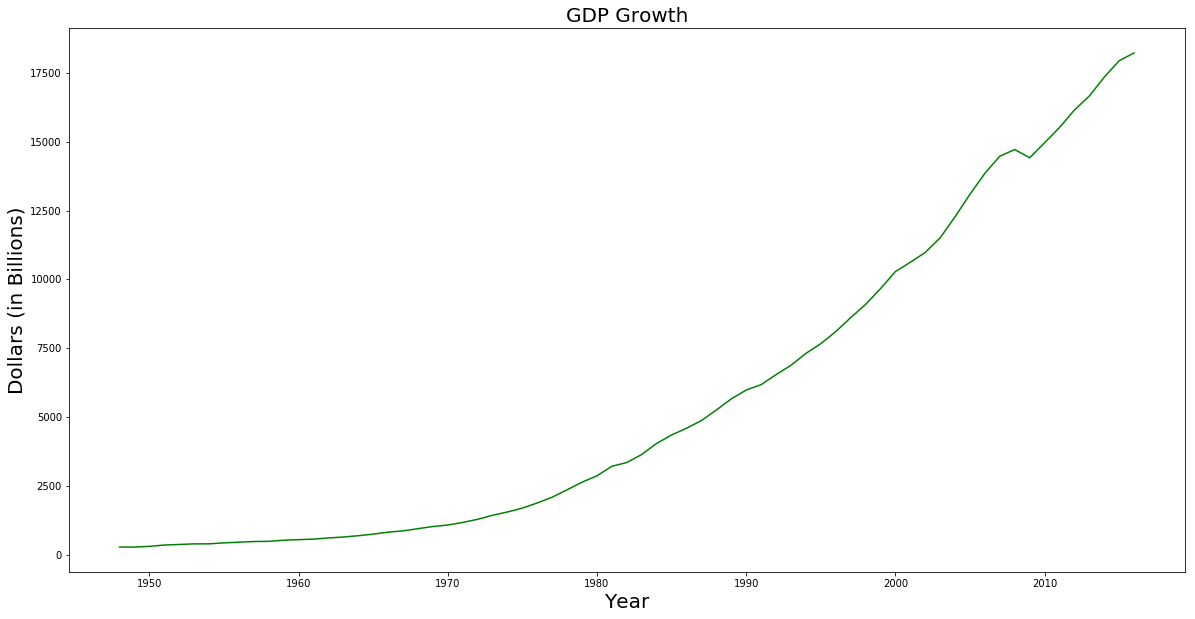

In [9]:
# plot crude data for GDP Growth
plt.figure(figsize=(20,10))
plt.title("GDP Growth", fontsize=20)
plt.xlabel("Year",  fontsize=20)
plt.ylabel("Dollars (in Billions)", fontsize=20)
plt.plot(x_axis,dollars, color='green')

In [11]:
# merge data frames on YEAR
total_df = pd.merge(percent_women_df,clean_yearly_gdp, how="left", on="Year")
total_df.head()

,Year,Women in Workforce(%),Dollars (in Billions)
0,1948,28.6,274.825
1,1949,29.0,272.850
2,1950,29.6,300.175
3,1951,30.7,347.325
4,1952,31.0,367.725


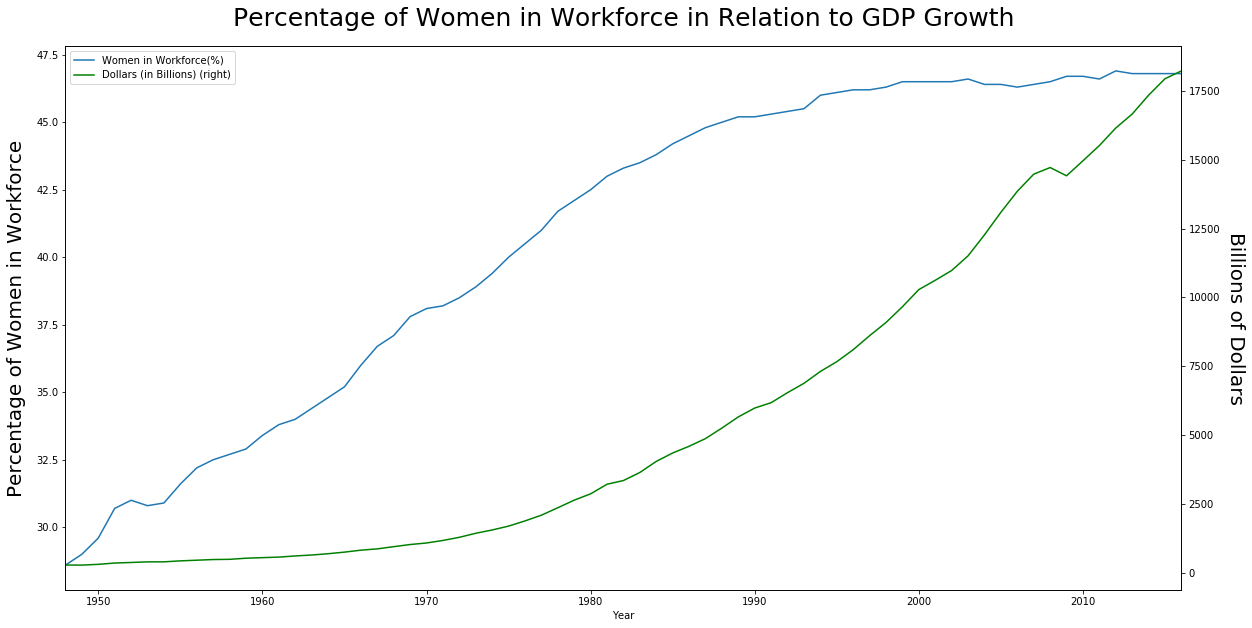

In [41]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
total_df.plot(x="Year", y="Women in Workforce(%)", ax=ax)
total_df.plot(x="Year", y="Dollars (in Billions)", color="green", secondary_y=True, ax=ax)
ax.set_title("Percentage of Women in Workforce in Relation to GDP Growth", fontsize=25, pad=20)
ax.set_ylabel("Percentage of Women in Workforce", fontsize=20, labelpad=10)
plt.ylabel("Billions of Dollars", fontsize=20, rotation=-90, labelpad=25)
plt.show()

fig.savefig("percent-women-workforce-gdp-growth.png",bbox_inches="tight")